NAME: Shukurah Omowumi JUNAID
FELLOW ID: FE/25/682447755
3MTT COHORT 3, OYO STATE
LEARNING TRACK: DATA ANALYSIS
PURPOSE: PYTHON CAPSTONE (ADVANCED DATA ANALYTICS) 911 Calls Analysis

In [ ]:
# Advanced Data Analytics - Portfolio Project: 911 Calls Analysis

## 1. Project Overview
## 2. Research Questions
## 3. Data Loading and Exploration
## 4. Data Cleaning and Preprocessing
## 5. Analysis & Visualization for Each Research Question
## 6. Issues and Proposed Solutions
## 7. Conclusion


Project Overview

This project analyzes 911 call data to uncover insights on emergency call patterns, frequency, and types of incidents,
leveraging big data analysis techniques using Python and visualization tools. The project aligns with the objectives of the 
Advanced Data Analytics Portfolio Project under Datafied Academy.


 Research Questions

1. What are the top locations (zip codes and townships) with the highest frequency of 911 emergency calls within the dataset?


2. What are the most common types of emergencies (EMS, Fire, Traffic) leading to 911 calls, and how are these distributed over time (hours, days, months)?


3. How do 911 call patterns vary across different days of the week and times of day?


4. What seasonal trends can be identified in 911 call frequencies, and how might these trends inform emergency response planning?


5. What challenges are present in using big data analytics for crime and emergency analysis, and how can these challenges be addressed using modern big data technologies?


In [6]:
#Data Loading and Exploration

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: adjust plot style
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('911.csv')

# Initial exploration
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [7]:
#Data Cleaning and Preprocessing

# Check for missing values
df.isnull().sum()

# Inspect columns for correct types
print(df.dtypes)

# Convert 'timeStamp' to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Extract 'Hour', 'Month', 'Day of Week'
df['Hour'] = df['timeStamp'].dt.hour
df['Month'] = df['timeStamp'].dt.month
df['DayOfWeek'] = df['timeStamp'].dt.dayofweek

# Map day of week integer to names
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['DayOfWeekName'] = df['DayOfWeek'].map(dmap)

# Extract Reason (EMS, Fire, Traffic) from 'title'
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

# Check the cleaned data
df.head()


lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,DayOfWeek,DayOfWeekName,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,3,Thu,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,3,Thu,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,14,12,3,Thu,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,16,12,3,Thu,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,16,12,3,Thu,EMS


19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64


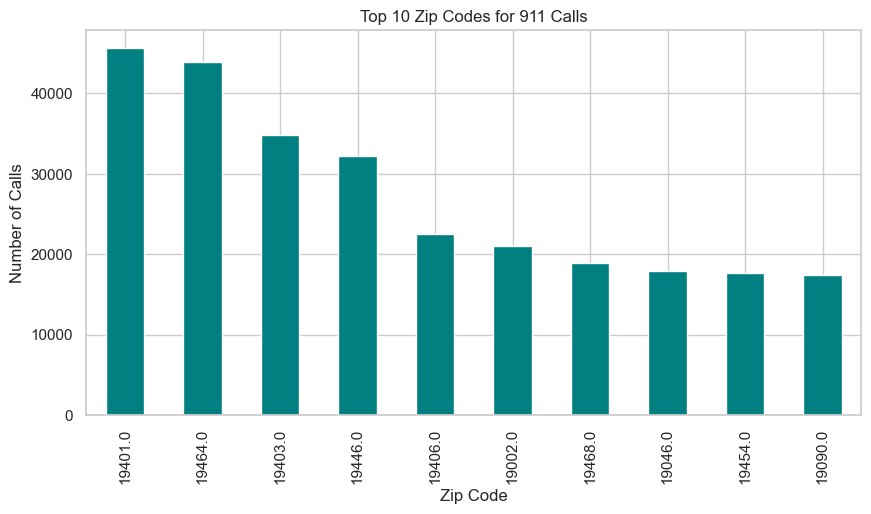

In [8]:
# Analysis & Visualization

# Research Question 1: Top zip codes and townships with highest frequency of 911 calls

# Top 5 zip codes
print(df['zip'].value_counts().head())

# Top 5 townships
print(df['twp'].value_counts().head())

# Visualize top 10 zip codes
plt.figure(figsize=(10,5))
df['zip'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Zip Codes for 911 Calls')
plt.xlabel('Zip Code')
plt.ylabel('Number of Calls')
plt.show()


EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64


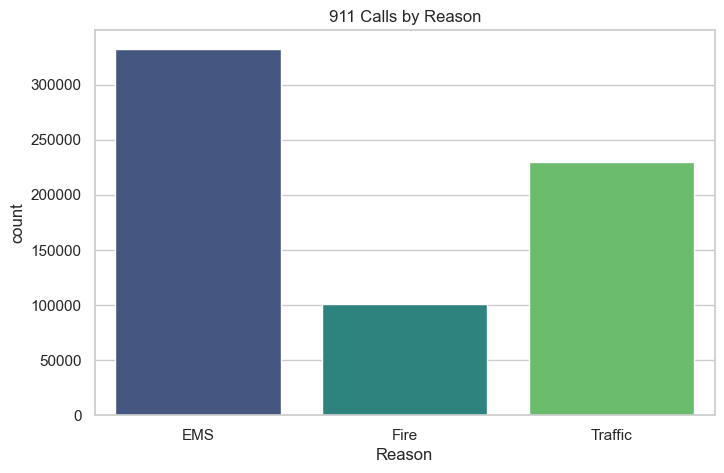

In [9]:
# Research Question 2: Most common types of emergencies and distribution over time

# Most common reason
print(df['Reason'].value_counts())

# Countplot of calls by Reason
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Reason', palette='viridis')
plt.title('911 Calls by Reason')
plt.show()


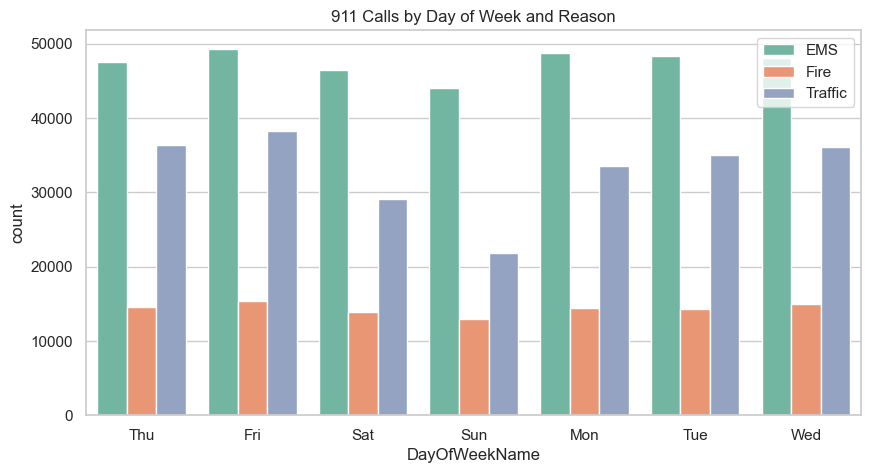

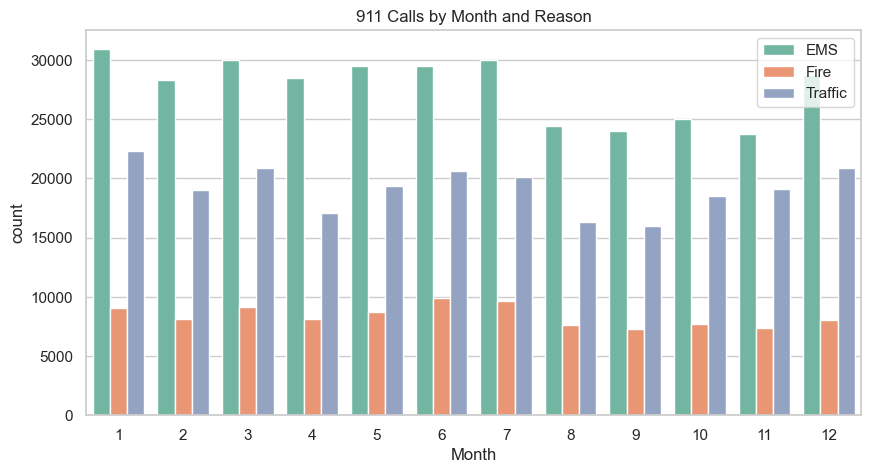

In [10]:
# Research Question 3: 911 call patterns across days of the week and times of day

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='DayOfWeekName', hue='Reason', palette='Set2')
plt.title('911 Calls by Day of Week and Reason')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Month', hue='Reason', palette='Set2')
plt.title('911 Calls by Month and Reason')
plt.legend(loc='upper right')
plt.show()


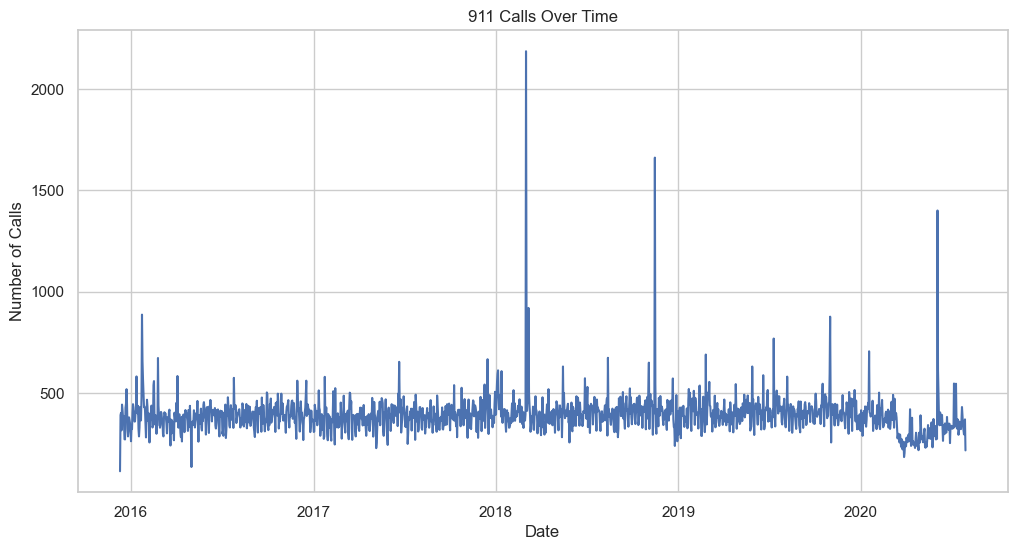

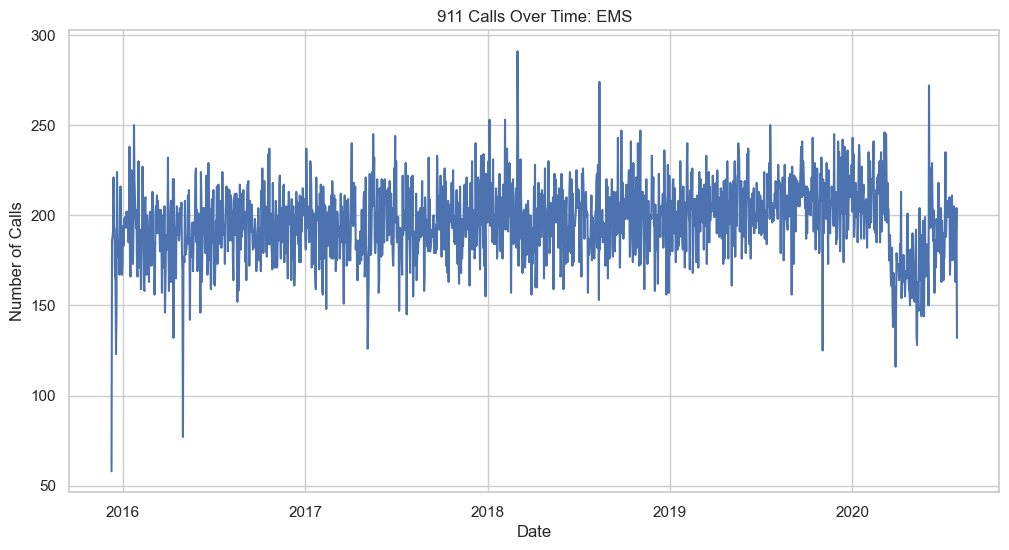

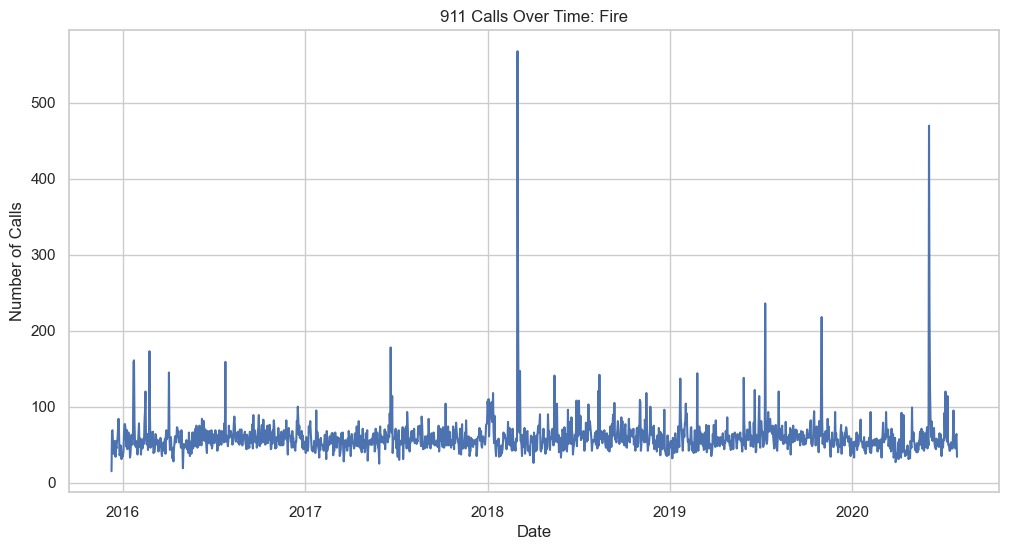

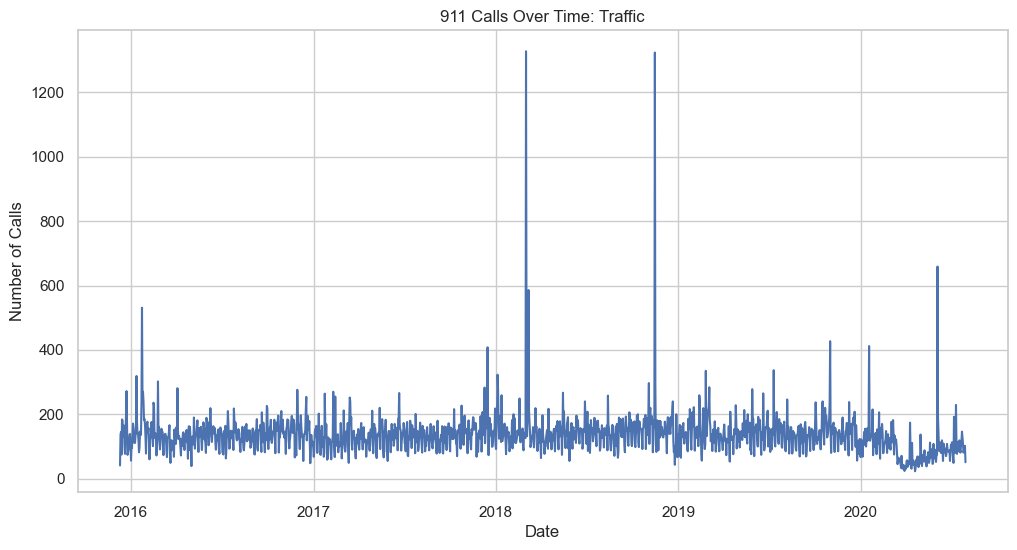

In [11]:
# Research Question 4: Seasonal trends and emergency planning insights

# Create a new 'Date' column
df['Date'] = df['timeStamp'].dt.date

# Plot call counts over time
calls_by_date = df.groupby('Date').count()['twp']

plt.figure(figsize=(12,6))
calls_by_date.plot()
plt.title('911 Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.show()

# Plot for each Reason
for reason in df['Reason'].unique():
    df_reason = df[df['Reason'] == reason]
    calls_by_date_reason = df_reason.groupby('Date').count()['twp']
    
    plt.figure(figsize=(12,6))
    calls_by_date_reason.plot()
    plt.title(f'911 Calls Over Time: {reason}')
    plt.xlabel('Date')
    plt.ylabel('Number of Calls')
    plt.show()


# Issues and Proposed Solutions

 



> Challenges in Big Data Analytics for Crime and Emergency Analysis:

Data Quality: Missing values, inconsistent formats, and noisy data.

Data Volume: Handling large datasets requires scalable systems.

Data Privacy: Sensitive information in emergency datasets.

Real-Time Processing Needs: Emergencies require timely insights.




> Proposed Solutions:

Use Apache Spark or Dask for scalable distributed analysis.

Apply data validation and cleaning pipelines systematically.

Implement privacy-preserving data anonymization.

Use streaming analytics for real-time event detection.


# Conclusion

Add a final markdown cell summarizing: 
Key findings from your analysis
Potential for your analysis to support emergency planning
Recommendations for scaling using big data tools


Advanced-Data-Analytics-911-Calls-Project/
│
├── data/
│   ├── 911_Calls.csv
│   └── 911_Calls_Cleaned_For_PBI.csv
│
├── notebooks/
│   └── 911_Calls_Analysis_Capstone_Project.ipynb
│
├── visualizations/
│   └── (Export Power BI report PDF / PBIX)
│
├── presentation/
│   └── 911_Calls_Analysis_Slides.pptx
│
└── README.md 

In [15]:
# Ensure necessary columns for Power BI export
export_df = df[['lat', 'lng', 'zip', 'twp', 'title', 'Reason', 'timeStamp', 'Hour', 'Month', 'DayOfWeekName', 'Date']].copy()

# Export to CSV for Power BI
export_df.to_csv('911_Calls_Cleaned_For_PBI.csv', index=False, encoding='utf-8')